## Resample time series data from hourly to daily, monthly, or yearly using pandas.
- Will learn Resampling pandas data-frame
- will learn to change the date-time format while plotting data with matplotlib.

In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import earthpy as et
import os

In [3]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [4]:
# set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [5]:
# Define relative path to file with hourly precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

In [6]:
data=pd.read_csv(file_path,
                 parse_dates=['DATE'],
                index_col='DATE',
                na_values=999.99,
                )

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1840 entries, 2003-01-01 01:00:00 to 2013-12-31 00:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   HPCP              1746 non-null   float64
 6   Measurement Flag  1840 non-null   object 
 7   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(4)
memory usage: 129.4+ KB


In [8]:
data.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [9]:
data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [24]:
def plot_data(data, period):
    fig, ax = plt.subplots(figsize=(10, 10))
    # Add x-axis and y-axis
    ax.scatter(data.index.values,
           data['HPCP'],
           color='purple')

    # Set title and labels for axes
    ax.set(xlabel="Date",
           ylabel="Precipitation (inches)",
           title=str(period)+ 'Precipitation - \n 2003-2013')
    plt.show()

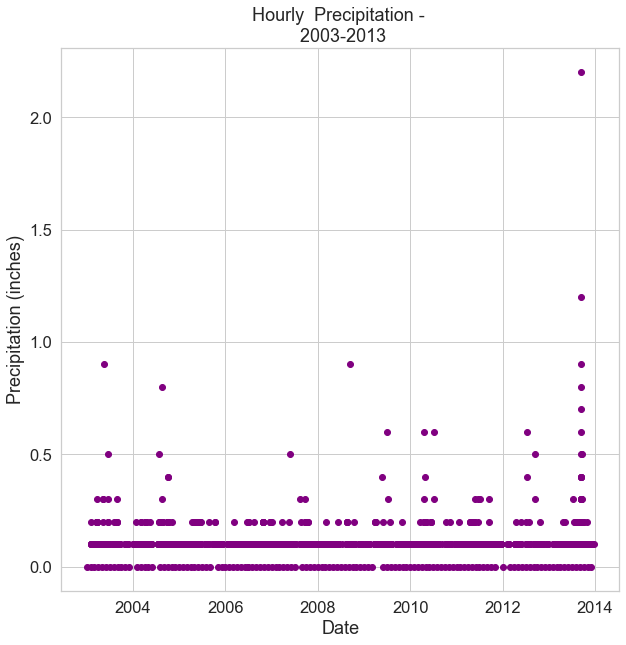

In [27]:
# lets plot the data on the basis of hours
# Create figure and plot space
plot_data(data, 'Hourly  ')

#### Lets first resample the data from hourly basis to daily basis, then daily to monthly, then monthly to yearly
#### This can be done in pandas very easily using the built in function resample(). It has the syntax:
- df.resample('D').sum()- to resample the data on daily basis.

In [28]:
daily_data=data.resample('D').sum()

In [29]:
daily_data.head()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-01,1650.5,40.03389,-105.28111,0.0
2003-01-02,0.0,0.00000,0.00000,0.0
2003-01-03,0.0,0.00000,0.00000,0.0
2003-01-04,0.0,0.00000,0.00000,0.0
2003-01-05,0.0,0.00000,0.00000,0.0


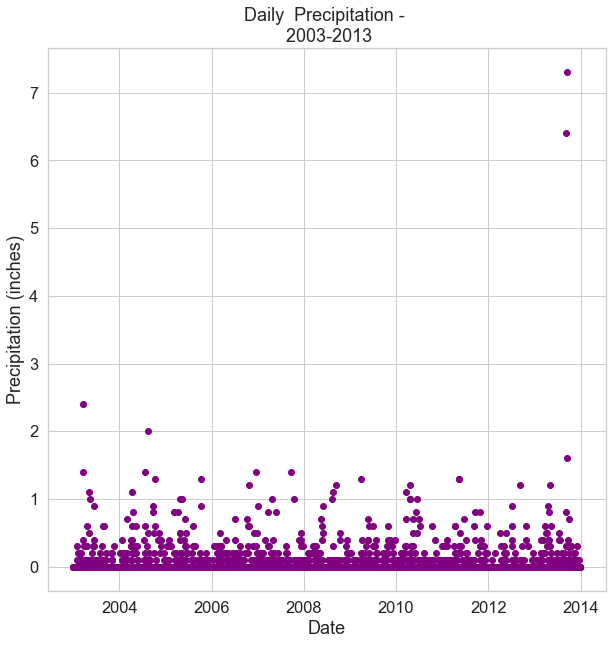

In [31]:
#lets plot daily data
plot_data(daily_data, 'Daily  ')

In [20]:
# now calculate montly precipitation
monthly_data=daily_data.resample('M').sum()

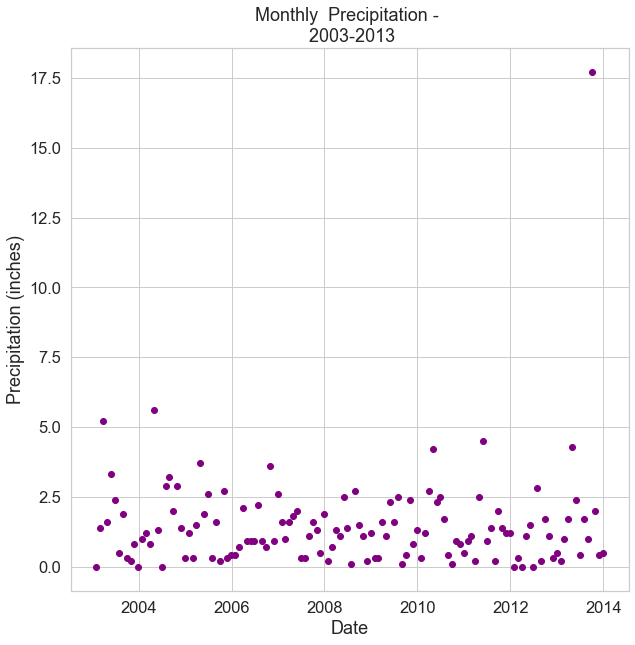

In [32]:
plot_data(monthly_data, 'Monthly  ')

In [33]:
# resample from monthly to yearly
yearly_data=monthly_data.resample('Y').sum()

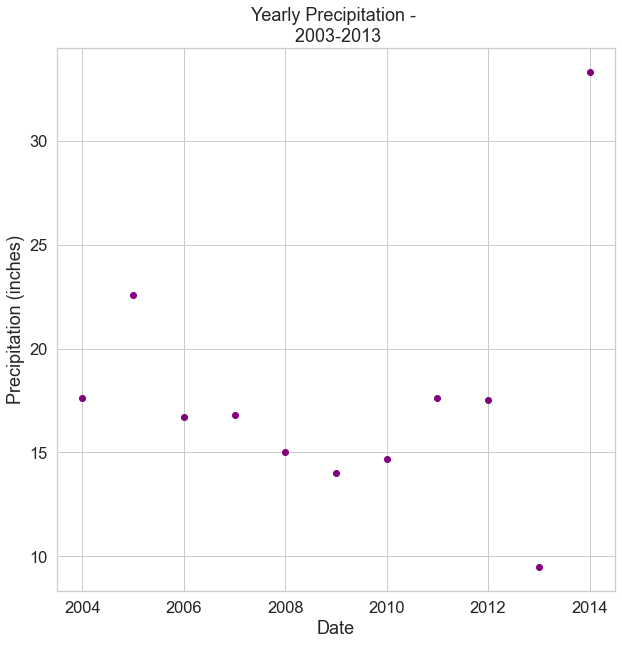

In [35]:
plot_data(yearly_data, 'Yearly ')

In [36]:
precip_june_aug=daily_data['2005-6-1':'2005-8-31']

In [37]:
precip_june_aug.head()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2005-06-01,1650.5,40.03389,-105.28111,0.0
2005-06-02,1650.5,40.03389,-105.28111,0.1
2005-06-03,3301.0,80.06778,-210.56222,0.3
2005-06-04,9903.0,240.20334,-631.68666,0.7
2005-06-05,0.0,0.00000,0.00000,0.0


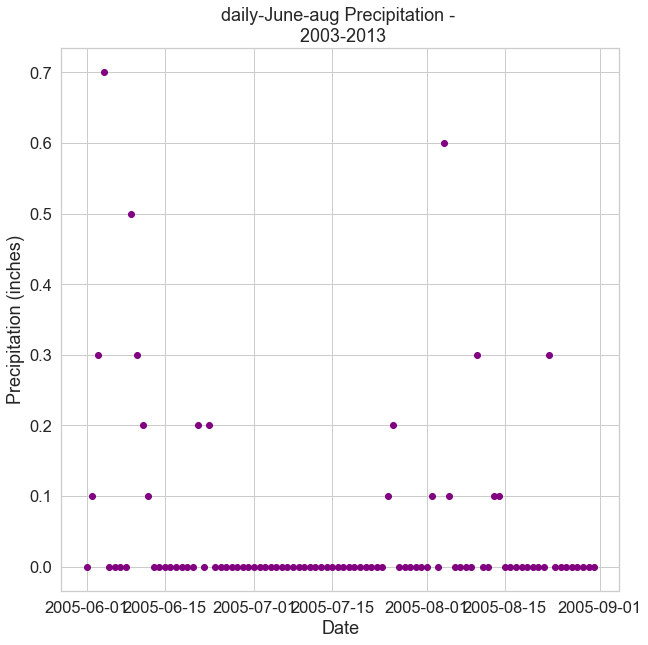

In [39]:
plot_data(precip_june_aug, 'daily-June-aug ')

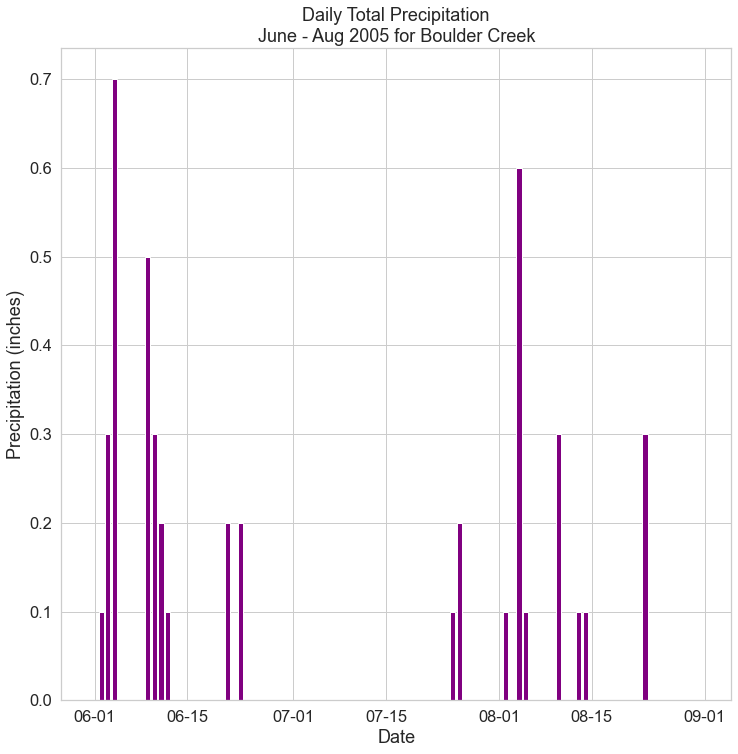

In [42]:
#lets format the date on X-axis 
from matplotlib.dates import DateFormatter
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug.index.values,
       precip_june_aug['HPCP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()


#### lets control the x-axis tick (inerval) for specific date
- like the set_major_formatter() function, we can use set_major_locator() function to apply the specific tick on x-axis
- also we use xlim attribute on ax.set() function to ensure that the start date is june 1 and end date is july 31.

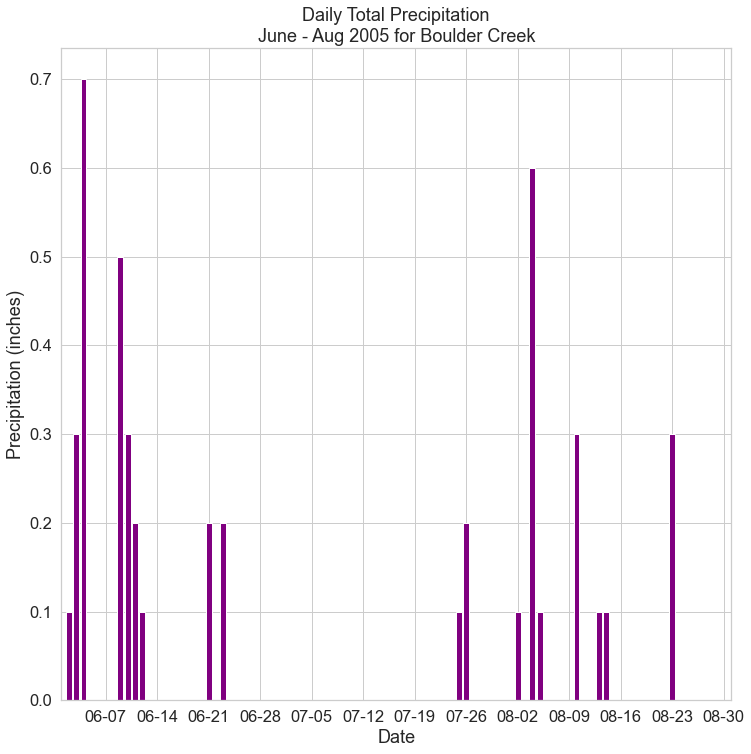

In [48]:
#lets format the date on X-axis
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug.index.values,
       precip_june_aug['HPCP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek",
      xlim=["2005-06-01", "2005-08-31"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) #you can put interval 2 for two week gap and so on.
plt.show()


### lets plot the two different plot for comparision: 
- one for   Time period A:  2012-08-01 to 2012-11-01
- anotherfor Time periods B: 2013-08-01 to 2013-11-01

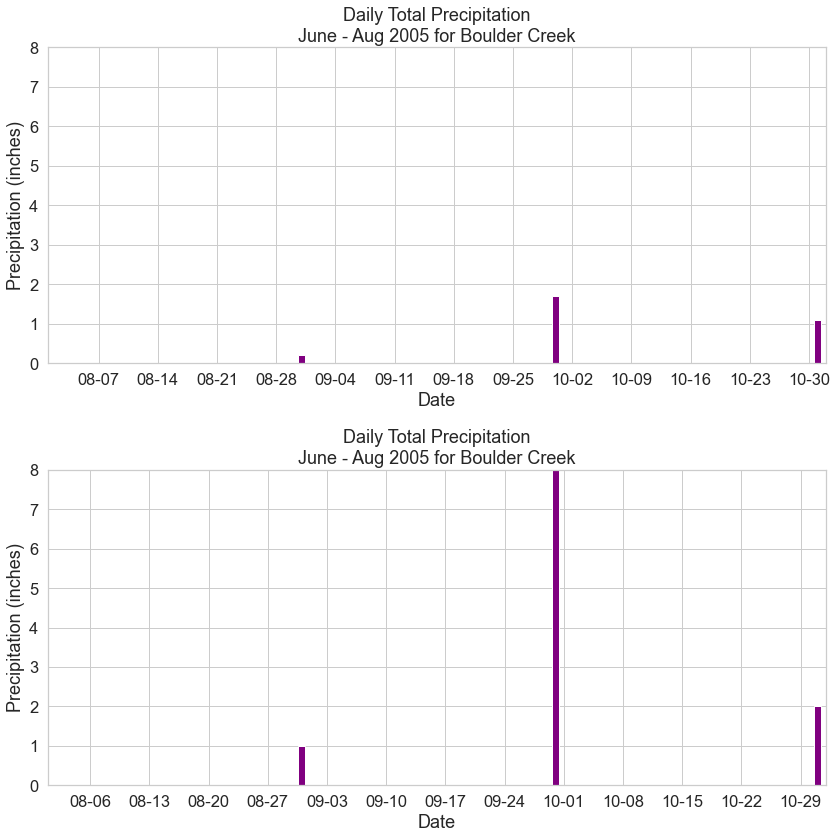

In [57]:
#lets format the date on X-axis
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# Create figure and plot space
fig, (ax1,ax2) = plt.subplots(2,figsize=(12, 12))

# Add x-axis and y-axis
ax1.bar(monthly_data.index.values,
       monthly_data['HPCP'],
       color='purple')

ax2.bar(monthly_data.index.values,
       monthly_data['HPCP'],
       color='purple')
# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek",
      xlim=["2012-08-01", "2012-11-1"],
       ylim=[0,8])
ax2.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek",
      xlim=["2013-08-01", "2013-11-1"],
       ylim=[0,8])

# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)

ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) #you can put interval 2 for two week gap and so on.

ax2.xaxis.set_major_formatter(date_form)

ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.tight_layout()
plt.show()